In [1]:
import datetime
import time
import sys
import glob
sys.path.append('..')
sys.path.append('../src')

# --- Dependencies
import pygmo as pg
import numpy as np
import pandas as pd
import sobol_seq
# import dovpanda

import plotly
from plotly import graph_objs as go
from plotly import tools
import plotly.express as px

from src.composite import PredictTutor, ModelsUnion
from src.ploting import plot_mo

def make_nd_pop(pro, x, y):
    nd_front = pg.fast_non_dominated_sorting(y)[0][0]
    nd_x = np.array(x)[nd_front]
    nd_y = np.array(y)[nd_front]
    t_pop = pg.population(pro)
    for i, p_vector in enumerate(nd_x):
        t_pop.push_back(x=p_vector, f=nd_y[i])
    return t_pop

params = ['cv_threshold', 'test_threshold', 'solution_comb', 'init_set', 'train_test_sp', 'solver', 'n_pred']

In [5]:
ID = 6
udp = pg.zdt(prob_id=ID, param=2) # == ZDT
pro = pg.problem(udp)


folder = './data/tutorm/factorial/{}_x5/pkl/'.format(pro.get_name())
name = '{}2*_default_tutor_loop*.pkl'.format(pro.get_name())
paths = [i for i in glob.glob('{}{}'.format(folder, name))]
cols = ['model name', 'i_fevals', 'p_distance', 'hypervolume', 'solution_comb']

# 'init_dataset_size', 'pred_x', 'pred_fitness_y', 'i_fevals',
#        'pop_ndf_x', 'pop_ndf_y', 'p_distance', 'solver', 'solution_comb',
#        'train_test_sp', 'cv_threshold', 'test_threshold', 'i_time',
#        'ref_point', 'hypervolume', 'ndf_size', 'ndf_space', 'fit_time',
#        'score_time', 'test_r2', 'test_explained_variance',
#        'test_neg_mean_squared_error', 'test_neg_mean_absolute_error',
#        'y_index', 'params hash', 'id', 'surr_score', 'ndf_surr_score',
#        'prediction_score', 'tutor_id']
columns = []
group = []
for p in paths:
    temp_df = pd.read_pickle(p)
#     temp_df = pd.read_csv(p)
    temp_df = temp_df
#     temp_df.dropna(inplace=True)
    temp_df = temp_df.query('solution_comb=="stack" or solution_comb=="ndf_score"')
#     temp_df.drop(['init_dataset_size'], axis=1, inplace=True, errors='ignore')
    temp_df['init_set'] = 1000 - int(temp_df['eval_budget'].values.tolist()[0]) 
    idx = p.find('.', 1)+1
    group_id = p[idx:idx+15]
    temp_df['group_id'] = group_id
    group.append(temp_df)

tut_concat = pd.concat(group, sort=True)
# name = 'factorial_ZDT4_22_{}.pkl'.format(len(mapr_concat))
# mapr_concat.to_pickle(folder+'concat/'+name)
tut_concat

,cv_threshold,error,eval_budget,feature_dim,fit_time,group_id,hypervolume,i_fevals,i_time,id,...,test_explained_variance,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2,test_threshold,train_test_sp,tutor_id,x_init,y_index,y_init
0,(test_r2 > 0.65),NaN,500,2,"[0.3546037674, 0.359064579]",140182936349968,5.733255,600,20.7699,1.401831e+14,...,"[0.9939627775, 0.9989311149]","[-0.0059091627, -0.0230916953]","[-0.0001381196, -0.0017310212]","[0.9937896148, 0.9988949797]",(ndf_surr_score > 0.9),0.25,140182936349968,"[[0.811, 0.523], [0.589, 0.095], [0.049, 0.125...","[0.0, 1]","[[0.9998183431327761, 8.538121902906866], [0.9..."
1,(test_r2 > 0.65),NaN,500,2,"[0.3589501381, 0.3846487999]",140182936349968,6.419106,700,42.0778,1.401821e+14,...,"[0.9972330231, 0.9996520665]","[-0.0067320459, -0.0281157079]","[-0.000134523, -0.0015414605]","[0.9971402733, 0.9996452773]",(ndf_surr_score > 0.9),0.25,140182936349968,"[[0.811, 0.523], [0.589, 0.095], [0.049, 0.125...","[0.0, 1]","[[0.9998183431327761, 8.538121902906866], [0.9..."
2,(test_r2 > 0.65),NaN,500,2,"[0.3559997082, 0.3816249371]",140182936349968,6.493473,800,63.489,1.401829e+14,...,"[0.9971203738, 0.9997824894]","[-0.0070115527, -0.0308947412]","[-0.0002018071, -0.0019702089]","[0.9970580842, 0.9997812009]",(ndf_surr_score > 0.9),0.25,140182936349968,"[[0.811, 0.523], [0.589, 0.095], [0.049, 0.125...","[0.0, 1]","[[0.9998183431327761, 8.538121902906866], [0.9..."
3,(test_r2 > 0.65),NaN,500,2,"[0.4157438278, 0.386824131]",140182936349968,6.584699,900,85.411,1.401820e+14,...,"[0.9984461628, 0.9999150098]","[-0.0048027872, -0.023079269]","[-8.51046e-05, -0.0009514368]","[0.9984459878, 0.9999148171]",(ndf_surr_score > 0.9),0.25,140182936349968,"[[0.811, 0.523], [0.589, 0.095], [0.049, 0.125...","[0.0, 1]","[[0.9998183431327761, 8.538121902906866], [0.9..."
4,(test_r2 > 0.65),NaN,500,2,"[0.4303121567, 0.4258952141]",140182936349968,6.587469,1000,106.724,1.401821e+14,...,"[0.9992788265, 0.999876441]","[-0.00353336, -0.026359088]","[-4.064e-05, -0.0015121598]","[0.9992632366, 0.9998744408]",(ndf_surr_score > 0.9),0.25,140182936349968,"[[0.811, 0.523], [0.589, 0.095], [0.049, 0.125...","[0.0, 1]","[[0.9998183431327761, 8.538121902906866], [0.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,(test_r2 > 0.2),NaN,1000,2,"[0.4723017216, 0.5036091805]",140699134723216,6.673385,977,3492.82,1.406990e+14,...,"[0.9980003316, 0.9989736307]","[-0.0032078726, -0.0535792107]","[-0.0001219833, -0.0052795441]","[0.9979925631, 0.9989699677]",(ndf_surr_score > 0),0.10,140699134723216,None,"[0, 1]",None
98,(test_r2 > 0.2),NaN,1000,2,"[0.4687116146, 0.4770545959]",140699134723216,6.673385,987,3533.79,1.406991e+14,...,"[0.9980345606, 0.9990639698]","[-0.0030080958, -0.0497360404]","[-0.0001267343, -0.0043516727]","[0.9980249455, 0.9990581766]",(ndf_surr_score > 0),0.10,140699134723216,None,"[0, 1]",None
99,(test_r2 > 0.2),NaN,1000,2,"[0.4339444637, 0.4421987534]",140699134723216,6.673404,997,3572.83,1.406996e+14,...,"[0.9988029981, 0.999116974]","[-0.0031665165, -0.0551884615]","[-8.14089e-05, -0.005500578]","[0.9987853157, 0.9991013925]",(ndf_surr_score > 0),0.10,140699134723216,None,"[0, 1]",None
0,(test_r2 > 0.2),NaN,250,2,"[0.4703564644, 0.4642860889]",140590337411408,5.877032,850,36.7353,1.405910e+14,...,"[0.9963810841, 0.9991231486]","[-0.0043747943, -0.0243474216]","[-6.39639e-05, -0.0018738099]","[0.9963777634, 0.9991224199]",(ndf_surr_score > 0.9),0.10,140590337411408,"[[0.12466666666666666, 0.8246666666666667], [0...","[0.0, 1]","[[0.9211844511382976, 9.487929668185972], [0.9..."


In [ ]:
# px.scatter_matrix(tut_concat.query('i_fevals==1000')[params + ["p_distance"]], dimensions=params, color="p_distance")

In [ ]:
# tut_concat['p_distance'] = tut_concat['p_distance'].apply(lambda x: np.mean(np.asarray(x).astype(np.float32)))
# px.parallel_categories(tut_concat.query('i_fevals==1000')[params + ["p_distance", 'hypervolume']], color='p_distance', template="presentation", color_continuous_scale=px.colors.sequential.Inferno)

In [ ]:
# px.parallel_categories(tut_concat.query('i_fevals==1000')[params + ["p_distance"]].nlargest(20,'p_distance'), color='p_distance', template="presentation", color_continuous_scale=px.colors.sequential.Plasma_r)

In [ ]:
# px.parallel_categories(tut_concat.query('i_fevals==1000')[params + ["p_distance"]].nsmallest(20,'p_distance'), color='p_distance', template="presentation", color_continuous_scale=px.colors.sequential.Agsunset)

# Concat results

In [6]:
# folder = './data/tutorm/factorial/bench_full_3/'
# paths = [i for i in glob.glob('{}ZDT42*_default_tutor_loop*.csv'.format(folder))]

# group = []
# for p in paths:
# #     temp_df = pd.read_pickle(p)[columns]
#     temp_df = pd.read_csv(p)
#     temp_df = temp_df
#     temp_df = temp_df.query('i_fevals==1000 and solution_comb=="stack" or solution_comb=="ndf_score"')
#     temp_df['eval_budget'].fillna(0, inplace=True)
# #     temp_df.drop(['init_dataset_size'], axis=1, inplace=True, errors='ignore')
#     temp_df['init_set'] = 1000 - (int(temp_df['eval_budget'].values.tolist()[0]) if len(temp_df['eval_budget']) else 0)
#     group_id = p[idx:idx+15]
#     temp_df['group_id'] = group_id
#     group.append(temp_df)

all_concat = tut_concat.query('i_fevals==950 or i_fevals==1000 and solution_comb=="stack" or solution_comb=="ndf_score"')

In [7]:
len(all_concat)

53823

In [ ]:
# # all_concat['p_distance'] = all_concat['p_distance'].apply(lambda x: np.mean(np.asarray(x).astype(np.float32)))
# all_concat['p_distance'] = all_concat['p_distance'].round(decimals=3)
# px.parallel_categories(all_concat[params + ["p_distance"]].nsmallest(50,'p_distance'), color='p_distance', template="presentation", color_continuous_scale=px.colors.sequential.Agsunset)

In [ ]:
# px.parallel_categories(all_concat[params + ["p_distance"]].nlargest(50,'p_distance'), color='p_distance', template="presentation", color_continuous_scale=px.colors.sequential.Plasma_r)

In [8]:
# folder = './data/tutorm/factorial/*/'
# paths = [i for i in glob.glob('{}ZDT62*_default_tutor_loop*.pkl'.format(folder))]

# group = []
# for p in paths:
#     temp_df = pd.read_pickle(p)
# #     temp_df = pd.read_csv(p)
#     temp_df = temp_df
#     temp_df = temp_df.query('i_fevals>=950 and i_fevals<=1000 and solution_comb=="stack" or solution_comb=="ndf_score"')
#     temp_df['eval_budget'].fillna(0, inplace=True)
# #     temp_df.drop(['init_dataset_size'], axis=1, inplace=True, errors='ignore')
#     temp_df['init_set'] = 1000 - (int(temp_df['eval_budget'].values.tolist()[0]) if len(temp_df['eval_budget']) else 0)
#     idx = p.find('.', 1)+1
#     group_id = p[idx:idx+15]
#     temp_df['group_id'] = group_id
#     group.append(temp_df)

# all_concat = pd.concat(group, sort=True)
len(all_concat.groupby(params))

576

In [ ]:
len(all_concat.drop( all_concat[ [isinstance(i, str) for i in all_concat.tutor_id.values] ].index))

In [ ]:
temp = all_concat.drop( all_concat[ [isinstance(i, str) for i in all_concat.tutor_id.values] ].index)
len(temp.groupby(params))

In [ ]:
selection = []
for n, grp in all_concat.groupby(params):
    selection.append(grp.tutor_id.unique()[:5])
    
l = np.concatenate(selection).flatten()
len(l)
[isinstance(i, str) for i in l].index

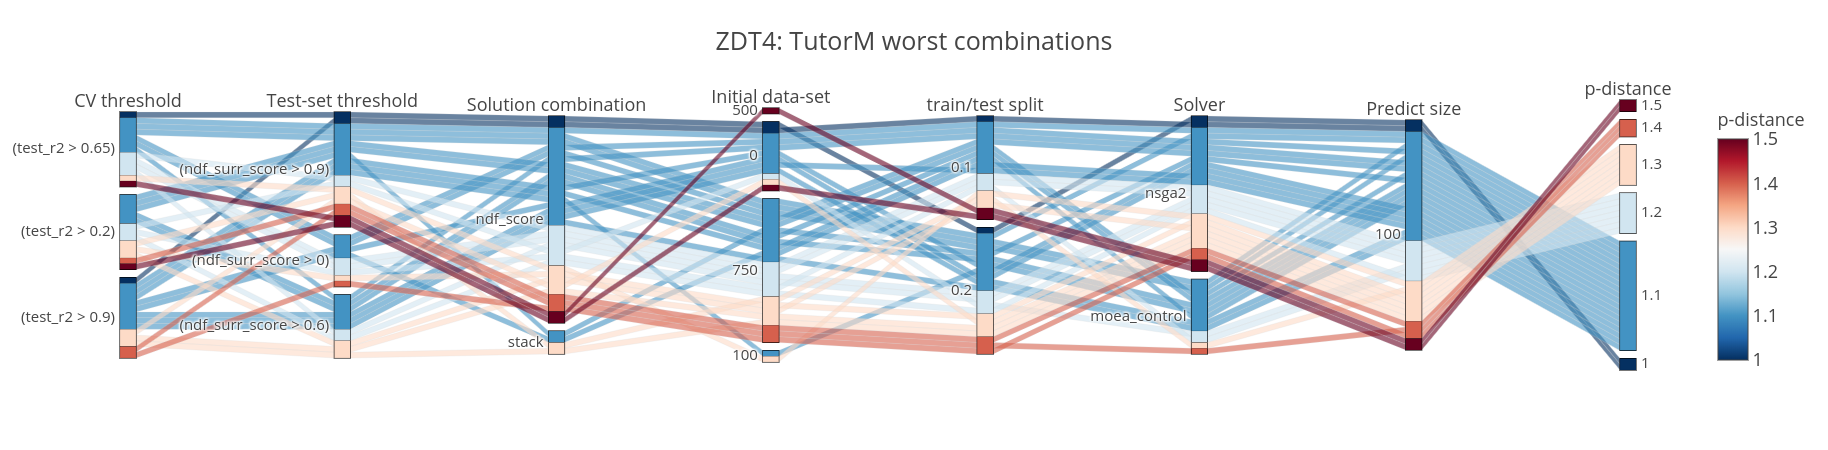

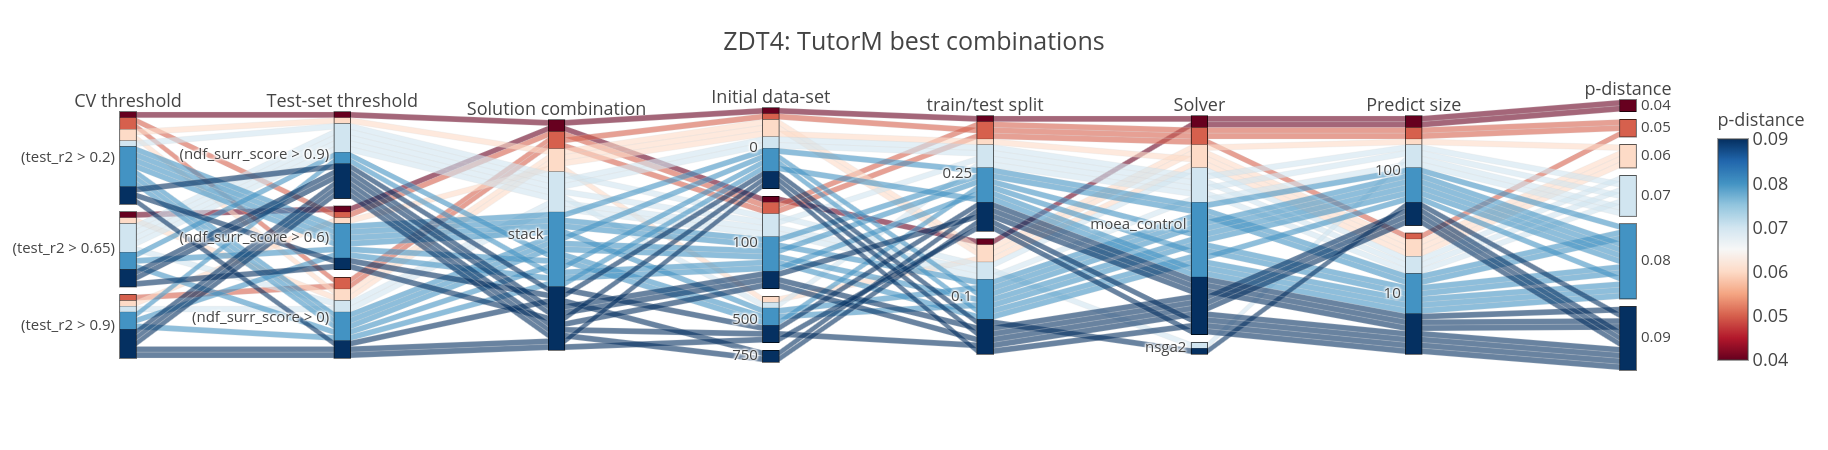

In [12]:
# params_plot = ['cv_threshold', 'test_threshold', 'solution_comb', 'train_test_sp', 'solver', 'n_pred', 'p_distance']

labels={'cv_threshold':'CV threshold', 
        'test_threshold':'Test-set threshold', 
        'solution_comb':'Solution combination', 
        'init_set': 'Initial data-set',
       'train_test_sp':'train/test split',
       'solver':'Solver',
       'n_pred': 'Predict size',
       'p_distance':'p-distance',}


allin = all_concat.groupby(params).p_distance.mean().reset_index()
# allin['p_distance'] = allin['p_distance'].round(decimals=2)
plot_worst = px.parallel_categories(allin.nlargest(40,'p_distance').round(decimals=1), 
                       color='p_distance', 
                       template="presentation", 
                       labels=labels,
                       title="ZDT4: TutorM worst combinations", 
                       color_continuous_scale=px.colors.sequential.RdBu_r)
plot_worst.show()
plot_best = px.parallel_categories(allin.nsmallest(40,'p_distance').round(decimals=2), 
                       color='p_distance', 
                       template="presentation", 
                       title="ZDT4: TutorM best combinations", 
                       labels=labels,
                       color_continuous_scale=px.colors.sequential.RdBu)
plot_best.show()

# ===== Write
plot_best.update_layout(title=None, coloraxis_showscale=False).write_image("./plots/factorial/config_{}_best_fact.svg".format(pro.get_name()), width=1400)
plot_worst.update_layout(title=None, coloraxis_showscale=False).write_image("./plots/factorial/config_{}_worst_fact.svg".format(pro.get_name()), width=1400)

# plot_best.update_layout(title=None, coloraxis_showscale=False).write_image("./plots/config_ZDT4_best_final.433.svg", width=1200)
# plot_worst.update_layout(title=None, coloraxis_showscale=False).write_image("./plots/config_ZDT4_worst_final.433.svg", width=1200)

In [ ]:
# selection = []
# for n, grp in all_concat.groupby(params):
# #     print(len(grp.tutor_id.unique()))
#     selection.append(grp.tutor_id.unique()[:5])
# params

# np.random.choice(grp.tutor_id.unique(), 5)

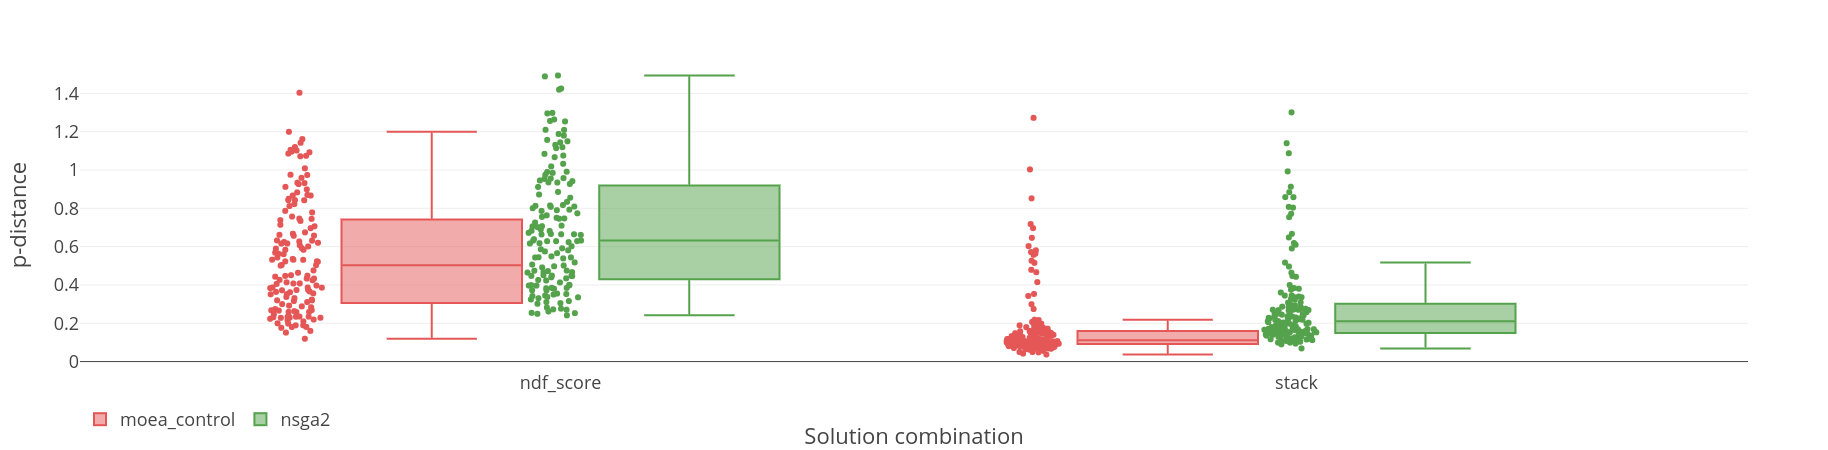

In [19]:
dev_plot = px.box(allin, 
          y="p_distance", 
          x="solution_comb", 
          color="solver", 
          template="presentation",
                  color_discrete_sequence=['#E45756', '#54A24B', '#4C78A8', '#72B7B2', '#FF9DA6', '#B279A2'],
          labels=labels,
          points="all", 
          hover_data=allin.columns)
dev_plot.update_layout(legend_orientation='h').show()
dev_plot.write_image("./plots/factorial/config_{}_solver.svg".format(pro.get_name()), width=1300)

In [ ]:
# px.colors.qualitative.T10

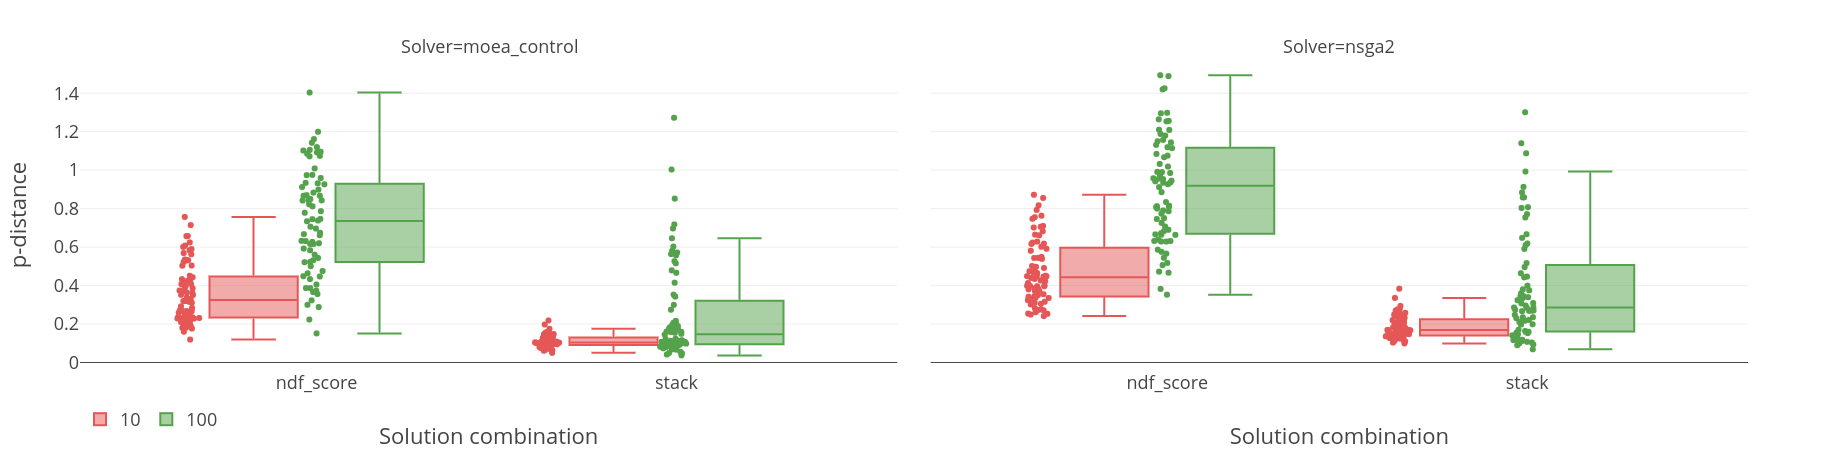

In [18]:
dev_plot = px.box(allin, 
          y="p_distance", 
          x="solution_comb", 
          color="n_pred", 
                  facet_col='solver',
          template="presentation",
          color_discrete_sequence=['#E45756', '#54A24B', '#4C78A8', '#72B7B2', '#FF9DA6', '#B279A2'],
          labels=labels,   
          points="all", 
            hover_data=allin.columns)
dev_plot.update_layout(legend_orientation='h').show()
# dev_plot.write_image("./plots/factorial/config_{}_test_score.svg".format(pro.get_name()), width=1300)

In [ ]:
# fig.write_image("./plots/{}_5x_p_distance.svg".format(pro.get_name()), width=1200)


In [ ]:
exp = all_concat.groupby(params).size().to_frame('count').reset_index()
exp

In [ ]:
params

In [ ]:
from sklearn.model_selection import ParameterGrid
grid = {    
    'n_pred': [10, 100],
    'solver': ['moea_control', 'nsga2'],
    'train_test_sp': [0.10, 0.25],
    'cv_threshold': ['(test_r2 > 0.2)', '(test_r2 > 0.65)', '(test_r2 > 0.9)'],
    'test_threshold': ['(ndf_surr_score > 0)', '(ndf_surr_score > 0.6)', '(ndf_surr_score > 0.9)'],
    'solution_comb': ['ndf_score', 'stack'],
    'init_set': [0, 100, 500, 750]
}

gd = ParameterGrid(grid)


grid = pd.DataFrame([*gd])
grid

In [ ]:
merged = exp.merge(grid, indicator=True, how='outer')
diff = merged[merged['_merge'] == 'right_only']
diff

In [ ]:
import json

df = diff.copy()

df.reset_index()
df['problem_name'] = 'zdt'
df['prob_id'] = 6
df['prob_dim'] = 2
df['obj'] = 2 
df['eval_budget'] = 1000

df['seed'] = 42
df['eval_budget'] = 1000

df.drop(['count', '_merge'], axis=1, inplace=True)
df.rename({'init_set': 'start_set', 'n_pred': 'pred_count'}, axis=1, inplace=True)
df['start_set'] = df['start_set']/1000



# param = json.loads(df.to_json(orient='records'))
# for p in param:
#     p['trololol'] = 12124234235234234
# param

df.to_json('./fact_zdt6_conf.192.json', orient='records')